In [1]:
# import libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# get data

data = pd.read_excel('estrid.xlsx')

In [3]:
data

,Name,Handle,Deliverable,Following,Follower Count,Views,Reach,Reach Rate,Link Clicks,Log-LinkClicks,CTR,Sticker Taps,Log-StickerTaps,Engagement Rate,Engagement by Follower,Impressions
0,Tara Maynard,@taramays25,IG Story,266K,266000,143273,143273,0.538620,209,2.320146,0.001459,79,1.897627,0.002010,0.001083,143143
1,Poppy Adams,@poppyadams,IG Story,66.8K,66800,59751,59751,0.894476,265,2.423246,0.004435,82,1.913814,0.005807,0.005195,60459
2,Grace Shadrack,@graceshadrack,IG Story,168K,168000,53230,53230,0.316845,80,1.903090,0.001503,150,2.176091,0.004321,0.001369,53230
3,Lisia Baylis-Zullo,@lidiabayliszullo,IG Story,137K,137000,111965,111965,0.817263,75,1.875061,0.000670,73,1.863323,0.001322,0.001080,115086
4,Ashleigh,@cardiff.mum,IG Story,303K,303000,95000,75906,0.250515,176,2.245513,0.001853,36,1.556303,0.002793,0.000700,79184
5,Misha Grimes,@misha_grimes,IG Story,159K,159000,172435,172435,1.084497,170,2.230449,0.000986,248,2.394452,0.002424,0.002629,175494
6,Chloe Burrows,@chloeburrows,IG Story,1.6M,1600000,363020,363020,0.226887,371,2.569374,0.001022,205,2.311754,0.001587,0.000360,372296
7,Misha Grimes,@misha_grimes,IG Story,159K,159000,115443,115443,0.726057,622,2.793790,0.005388,443,2.646404,0.009225,0.006698,118754
8,Misha Grimes,@misha_grimes,IG Story,159K,159000,142630,142630,0.897044,531,2.725095,0.003723,332,2.521138,0.006051,0.005428,144152
9,Molly-Mae Hague,@mollymae,IG Story,6.4M,6400000,3998695,3959020,0.618597,41174,4.614623,0.010297,18755,4.273117,0.015137,0.009364,3998695


In [4]:
# check data types

data.dtypes

Name                       object
Handle                     object
Deliverable                object
Following                  object
Follower Count              int64
Views                       int64
Reach                       int64
Reach Rate                float64
Link Clicks                 int64
Log-LinkClicks            float64
CTR                       float64
Sticker Taps                int64
Log-StickerTaps           float64
Engagement Rate           float64
Engagement by Follower    float64
Impressions                 int64
dtype: object

### Cleaning

In [5]:
# clean column names 

def clean_data(df):
    df.columns=[col.lower().replace(' ', '-') for col in df.columns]
    return df

In [6]:
data = clean_data(data)

In [7]:
# convert percentages 

columns_to_percent = ['reach-rate', 'ctr', 'engagement-rate', 'engagement-by-follower']

for column in columns_to_percent:
    data[column] = (data[column] * 100).round(2)


In [8]:
data.head()

,name,handle,deliverable,following,follower-count,views,reach,reach-rate,link-clicks,log-linkclicks,ctr,sticker-taps,log-stickertaps,engagement-rate,engagement-by-follower,impressions
0,Tara Maynard,@taramays25,IG Story,266K,266000,143273,143273,53.86,209,2.320146,0.15,79,1.897627,0.20,0.11,143143
1,Poppy Adams,@poppyadams,IG Story,66.8K,66800,59751,59751,89.45,265,2.423246,0.44,82,1.913814,0.58,0.52,60459
2,Grace Shadrack,@graceshadrack,IG Story,168K,168000,53230,53230,31.68,80,1.903090,0.15,150,2.176091,0.43,0.14,53230
3,Lisia Baylis-Zullo,@lidiabayliszullo,IG Story,137K,137000,111965,111965,81.73,75,1.875061,0.07,73,1.863323,0.13,0.11,115086
4,Ashleigh,@cardiff.mum,IG Story,303K,303000,95000,75906,25.05,176,2.245513,0.19,36,1.556303,0.28,0.07,79184


### EDA

#### Lets create a new target where engagement rate is either high or low

In [9]:
# get the 65th percentile value of engagement rate
eng65 = round(np.percentile(data['engagement-rate'], 60), 2)

# make a new target variable that captures whether engagement is high (1) or low (0)
data['engagement_target'] = np.where(data['engagement-rate'] > eng65, 1, 0)

In [10]:
data.engagement_target.value_counts()

0    6
1    4
Name: engagement_target, dtype: int64

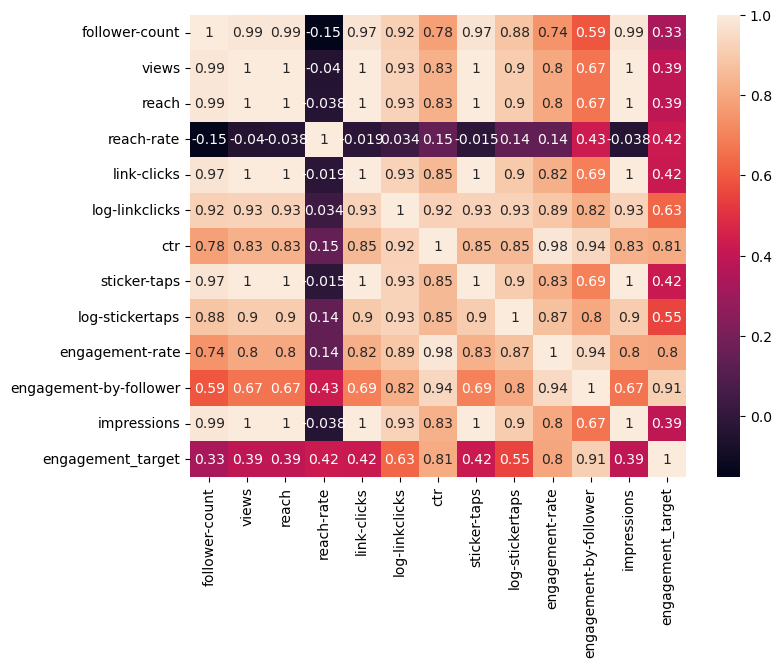

In [11]:
# check multicollinearity

corr_matrix = data.corr(method='pearson') 
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

### Modeling

In [12]:
# import libraries 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

#### Splitting into X-features and y-target. We are trying to predict whether engagement will be high(1) or low(0).

In [13]:
# dropping columns that have high collinearity between themselves and uneeded columns

X = data.drop(['engagement_target','engagement-rate','views','link-clicks','sticker-taps','name','handle','deliverable','following'],axis=1)
y = data['engagement_target']

In [14]:
X.columns

Index(['follower-count', 'reach', 'reach-rate', 'log-linkclicks', 'ctr',
       'log-stickertaps', 'engagement-by-follower', 'impressions'],
      dtype='object')

#### Splitting into Training and Testing Data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)
print('X_train shape is:',X_train.shape)
print('y_train shape is:', y_train.shape)
print('X_test shape is:', X_test.shape)
print('y_train shape is:', y_test.shape)

X_train shape is: (6, 8)
y_train shape is: (6,)
X_test shape is: (4, 8)
y_train shape is: (4,)


#### Here we will transform and scale our data

In [16]:
transformer = MinMaxScaler().fit(X_train) # only fitting on the Train data

X_train_norm = transformer.transform(X_train)
print(X_train_norm.shape)
X_train_scale = pd.DataFrame(X_train_norm, index = X_train.index, columns=X_train.columns)
X_train_scale.head()

(6, 8)


,follower-count,reach,reach-rate,log-linkclicks,ctr,log-stickertaps,engagement-by-follower,impressions
3,0.011084,0.013391,0.880124,0.000000,0.000000,0.113007,0.045977,0.013871
1,0.000000,0.000000,1.000000,0.200099,0.385417,0.131592,0.517241,0.000000
0,0.031453,0.021420,0.447360,0.162466,0.083333,0.125634,0.045977,0.020995
7,0.014558,0.014283,0.738509,0.335356,0.489583,0.401242,0.689655,0.014802
4,0.037296,0.004143,0.000000,0.135223,0.125000,0.000000,0.000000,0.004755


In [17]:
X_test_norm = transformer.transform(X_test)
print(X_test_norm.shape)
X_test_scale = pd.DataFrame(X_test_norm, index = X_test.index, columns=X_test.columns)
X_test_scale.head()

(4, 8)


,follower-count,reach,reach-rate,log-linkclicks,ctr,log-stickertaps,engagement-by-follower,impressions
8,0.014558,0.021255,1.003882,0.310281,0.312500,0.355135,0.540230,0.021251
2,0.015979,-0.001672,0.102950,0.010231,0.083333,0.228131,0.080460,-0.001836
5,0.014558,0.028899,1.295031,0.129724,0.031250,0.308504,0.218391,0.029210
6,0.242089,0.077776,-0.036646,0.253439,0.031250,0.278065,-0.034483,0.079182


#### Logistic Regression

In [18]:
logreg = LogisticRegression(max_iter=1000) # model
logreg.fit(X_train, y_train) # model training

# Evaluate the model
y_pred = logreg.predict(X_test) # model prediction
accuracy = logreg.score(X_test, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}, F1 Score: {:.2f}".format(accuracy, precision, recall, f1))
print("Model Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.75, Precision: 0.50, Recall: 1.00, F1 Score: 0.67
Model Confusion Matrix:
 [[2 1]
 [0 1]]


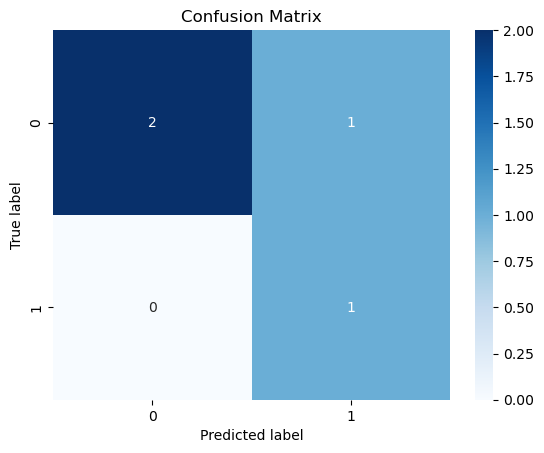

In [19]:
# create confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)

# create heatmap
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

# set labels for the plot
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

# display the plot
plt.show()